In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#importing the dataset and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import median_abs_deviation
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("LabelEncoded.csv")

In [ ]:
df

,Unnamed: 0,Year,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Weather_Condition,Traffic_Signal,Sunrise_Sunset,TimeDiff
0,0,0,2,39.063148,-84.032608,0.010,41040,7564,261,33,813,36.0,33.3,10.0,15,57,1,1,30.0
1,1,0,3,39.747753,-84.205582,0.010,23281,1663,832,33,432,35.1,31.0,9.0,15,54,0,1,30.0
2,2,0,2,39.627781,-84.188354,0.010,27444,1663,832,33,1052,36.0,33.3,6.0,15,54,1,0,30.0
3,3,0,3,40.100590,-82.925194,0.010,46765,7468,434,33,351,37.9,35.5,7.0,14,40,0,0,30.0
4,4,0,2,39.758274,-84.230507,0.000,30356,1663,832,33,432,34.0,31.0,7.0,21,57,0,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314280,314280,1,2,28.879630,-82.092960,0.722,23281,7556,1213,8,1684,80.0,80.0,10.0,17,44,0,0,360.0
314281,314281,1,2,37.993881,-92.795869,0.000,41642,940,183,22,731,75.0,75.0,10.0,5,4,0,0,360.0
314282,314282,1,2,46.617235,-113.051251,0.000,43111,1827,487,24,30,89.0,89.0,3.0,13,13,0,0,360.0
314283,314283,1,4,46.672100,-113.153690,9.486,43111,1827,487,24,30,57.0,57.0,4.0,0,13,0,1,360.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314285 entries, 0 to 314284
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         314285 non-null  int64  
 1   Year               314285 non-null  int64  
 2   Severity           314285 non-null  int64  
 3   Start_Lat          314285 non-null  float64
 4   Start_Lng          314285 non-null  float64
 5   Distance(mi)       314285 non-null  float64
 6   Street             314285 non-null  int64  
 7   City               314285 non-null  int64  
 8   County             314285 non-null  int64  
 9   State              314285 non-null  int64  
 10  Airport_Code       314285 non-null  int64  
 11  Temperature(F)     314285 non-null  float64
 12  Wind_Chill(F)      314285 non-null  float64
 13  Visibility(mi)     314285 non-null  float64
 14  Wind_Direction     314285 non-null  int64  
 15  Weather_Condition  314285 non-null  int64  
 16  Tr

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314285 entries, 0 to 314284
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               314285 non-null  int64  
 1   Severity           314285 non-null  int64  
 2   Start_Lat          314285 non-null  float64
 3   Start_Lng          314285 non-null  float64
 4   Distance(mi)       314285 non-null  float64
 5   Street             314285 non-null  int64  
 6   City               314285 non-null  int64  
 7   County             314285 non-null  int64  
 8   State              314285 non-null  int64  
 9   Airport_Code       314285 non-null  int64  
 10  Temperature(F)     314285 non-null  float64
 11  Wind_Chill(F)      314285 non-null  float64
 12  Visibility(mi)     314285 non-null  float64
 13  Wind_Direction     314285 non-null  int64  
 14  Weather_Condition  314285 non-null  int64  
 15  Traffic_Signal     314285 non-null  int64  
 16  Su

In [ ]:
#splitting the dataset and fitting the scaler

y = df['Severity']
X = df.drop('Severity', axis=1)

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

Tree = DecisionTreeClassifier()
Tree = Tree.fit(X_train, y_train)

y_pred = Tree.predict(X_test)
print("Tree accuracy: ", accuracy_score(y_test,y_pred)*100)

print("Train Accuracy:", Tree.score(X_train, y_train))
print("Test Accuracy:", Tree.score(X_test, y_test))

Tree accuracy:  79.25290739297135
Train Accuracy: 0.9998965906740697
Test Accuracy: 0.7925290739297135


In [ ]:
#Train decision trees using gini criteria

giniTree = DecisionTreeClassifier(criterion = "gini", splitter = "random", random_state = 42)
giniTree = giniTree.fit(X_train, y_train)

y_pred = giniTree.predict(X_test)
print("Gini Tree accuracy: ", accuracy_score(y_test,y_pred)*100)

print("Train Accuracy:", giniTree.score(X_train, y_train))
print("Test Accuracy:", giniTree.score(X_test, y_test))

Gini Tree accuracy:  78.6292696119764
Train Accuracy: 0.9998965906740697
Test Accuracy: 0.7862926961197639


In [ ]:
#Train decision trees using entropy criteria

entropyTree = DecisionTreeClassifier(criterion = "entropy", splitter = "random", random_state = 42)
entropyTree = entropyTree.fit(X_train, y_train)

y_pred = entropyTree.predict(X_test)
print("Entropy Tree accuracy: ", accuracy_score(y_test,y_pred)*100)
print("Train Accuracy:", entropyTree.score(X_train, y_train))
print("Test Accuracy:", entropyTree.score(X_test, y_test))

Entropy Tree accuracy:  78.54813306393879
Train Accuracy: 0.9998965906740697
Test Accuracy: 0.7854813306393879


In [ ]:
rf = RandomForestClassifier(criterion = "gini")
rf = rf.fit(X_train, y_train)

# Predict on the test set
best_test_pred = rf.predict(X_test)
print('Accuracy on training set: ', rf.score(X_train, y_train))
print('Accuracy on the test set: ', accuracy_score(y_test, best_test_pred))
print()

print("Classification Report")
print(classification_report(y_test, best_test_pred))
print()



Accuracy on training set:  0.9998965906740697
Accuracy on the test set:  0.8647087834290532

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.87      0.93      0.90     39430
           3       0.85      0.78      0.81     20470
           4       0.81      0.63      0.71      2941

    accuracy                           0.86     62857
   macro avg       0.63      0.58      0.61     62857
weighted avg       0.86      0.86      0.86     62857




Confusion Matrix


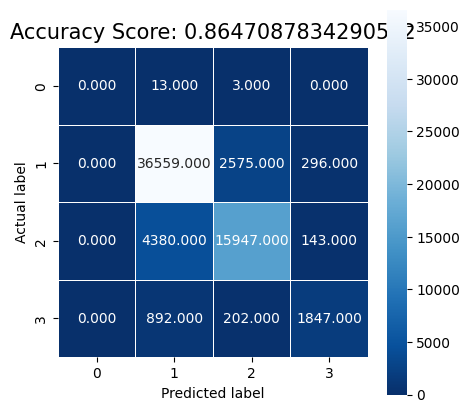

In [ ]:
print("Confusion Matrix")
# Plot a confusion matrix
cm = confusion_matrix(y_test, best_test_pred)
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, best_test_pred))
plt.title(all_sample_title, size = 15);
plt.savefig('MLP.png')
plt.show()

In [ ]:
rf = RandomForestClassifier(criterion = "entropy")
rf = rf.fit(X_train, y_train)

# Predict on the test set
best_test_pred = rf.predict(X_test)
print('Accuracy on training set: ', rf.score(X_train, y_train))
print('Accuracy on the test set: ', accuracy_score(y_test, best_test_pred))
print()

print("Classification Report")
print(classification_report(y_test, best_test_pred))
print()

Accuracy on training set:  0.9998846588287701
Accuracy on the test set:  0.8653610576387674

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.88      0.93      0.90     39430
           3       0.85      0.78      0.82     20470
           4       0.79      0.64      0.71      2941

    accuracy                           0.87     62857
   macro avg       0.63      0.59      0.61     62857
weighted avg       0.86      0.87      0.86     62857




Confusion Matrix


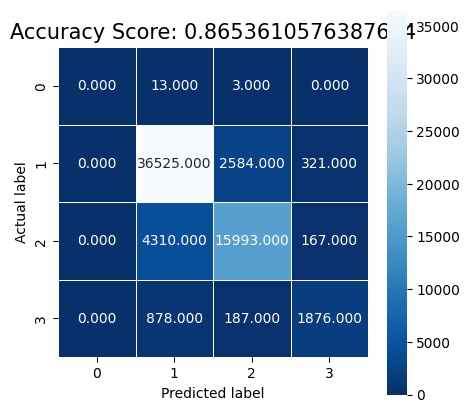

In [ ]:
print("Confusion Matrix")
# Plot a confusion matrix
cm = confusion_matrix(y_test, best_test_pred)
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, best_test_pred))
plt.title(all_sample_title, size = 15);
plt.savefig('MLP.png')
plt.show()

In [ ]:
dt = DecisionTreeClassifier(criterion = "gini")

grid = {'min_samples_split': [1, 5, 10, 50, 100, 500, 1000, 2000, 5000],
        'max_features': [1, 5, 9, 10, 11, 12, 15, 18]}


grid = GridSearchCV(dt, param_grid = grid, cv = 5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))

Best hyperparameters are: {'max_features': 10, 'min_samples_split': 50}
Best score is: 80.30926919043259


In [ ]:
dt = DecisionTreeClassifier(criterion = "entropy")

grid = {'min_samples_split': [1, 5, 10, 50, 100, 500, 1000, 2000, 5000],
        'max_features': [1, 5, 9, 10, 11, 12, 15, 18]}

grid = GridSearchCV(dt, param_grid = grid, cv = 5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))

Best hyperparameters are: {'max_features': 11, 'min_samples_split': 50}
Best score is: 80.94404815828622


In [ ]:
rf = RandomForestClassifier(criterion = "gini")
grid = {'n_estimators': [100, 200, 500, 1000],
        'max_depth': [1, 10, 20, 100, 500],
        'min_samples_split': [1, 2, 5, 10, 20, 100, 500]}

grid = GridSearchCV(rf, param_grid = grid, cv=5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))

In [ ]:
rf = RandomForestClassifier(criterion = "entropy")

grid = {'n_estimators': [100, 200, 500, 1000],
        'max_depth': [1, 10, 20, 100, 500],
        'min_samples_split': [1, 2, 5, 10, 20, 100, 500]}

grid = GridSearchCV(rf, param_grid = grid, cv=5)
newGrid = grid.fit(X_train, y_train)

print('Best hyperparameters are: '+str(newGrid.best_params_))
print('Best score is: '+str(newGrid.best_score_*100))